<a href="https://colab.research.google.com/github/ian-byrne/MADSmilestone2/blob/main/Supervised_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Clock Drawing Image Classification with Convolutional Neural Networks
### Stacey Beck and Ian Byrne

- Split data into sets of Training (x = image arrays ; y = labels), Test (image arrays), and Validation (~10% of the Training). 
- Build CNN using Pytorch for Training and Test:
  - Specify CUDA
  - 2D convolution, Normalization (for faster training), Non-linear Activation Function (ex. RELU), Max Pooling (downsampling to reduce learned parameters).
  - Define Layers 
  - Build Forward and backward pass
  - Define optimizer (due to many - deep - nodes) ex) ADAM
  - Calculate Loss (BCE)
  - Calculate Accuracy, Precision, Recall (Confusion Matrix)
  - Plot ROC and print Confusion Matrix



In [ ]:
# Clone the entire repo.
!git clone -l -s https://github.com/ian-byrne/MADSmilestone2.git

# Change directory into cloned repo
%cd MADSmilestone2

# List repo contents
#!ls

Cloning into 'MADSmilestone2'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 202 (delta 96), reused 83 (delta 27), pack-reused 0
Receiving objects: 100% (202/202), 734.75 KiB | 10.20 MiB/s, done.
Resolving deltas: 100% (96/96), done.
/content/MADSmilestone2


In [ ]:
#!rm -rf /content/MADSmilestone2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import io
import requests
from PIL import Image
import ast
import Images

In [ ]:
# Read round, id, label dictionary file

r_id_labl = open("Labeling/roundIdLabelDict.txt", "r")
#print(r_id_labl.readline())
contents = r_id_labl.read()
dictionary = ast.literal_eval(contents)
r_id_labl.close()

In [61]:
def get_images_test(id_rounds):
    counter = 0
    store_images = []
    image_data = []

    for id, array in id_rounds.items():
        for value in array:
            if counter < 10:
                url = 'https://clockimages.s3.us-west-1.amazonaws.com/NHATS_R' + str(
                    id) + '_ClockDrawings/' + value[0] + '.tif'

                # Open files and convert to work with Image in PIL
                response = requests.get(url)  # , stream = True)
                f = io.BytesIO(response.content)
                im_pil = Image.open(f)

                # Resize pil image files
                resized = im_pil.resize((im_pil.width//9,im_pil.height//9))
                imarray1 = np.array(resized)

                #imarray = np.logical_not(np.array(im)).astype(int) #bool to int, inverts values
                #image_data.append(get_coordinates(imarray1))  # , imarray1.shape[0], imarray1.shape[1]))

                #Store the np array images into a list
                store_images.append(imarray1)

                #Visualize the resized images
                viz_image(imarray1, resized)
                counter += 1

    return store_images




def viz_image(image, resized):
  print("shape: ", image.shape)

  # revert
  im2 = Image.fromarray(np.array(resized))
  plt.imshow(im2)
  plt.show()

shape:  (368, 284)


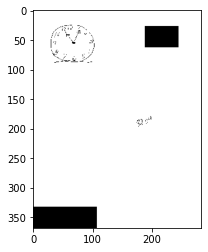

shape:  (368, 284)


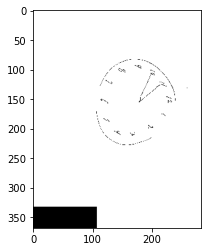

shape:  (368, 284)


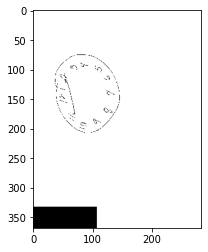

shape:  (368, 284)


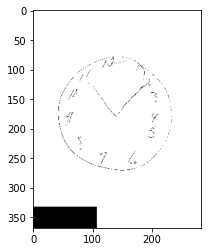

shape:  (368, 284)


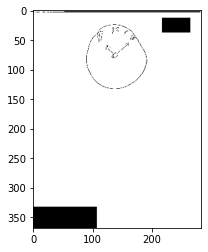

shape:  (368, 284)


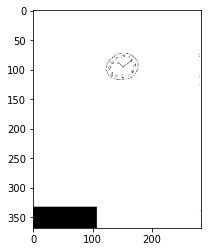

shape:  (368, 284)


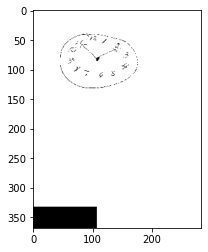

shape:  (368, 284)


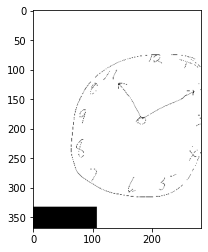

shape:  (368, 284)


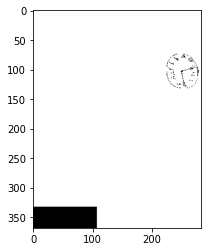

shape:  (368, 284)


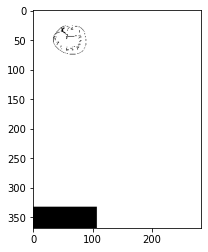

[array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]]),
 array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]]),
 array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  Tr

In [62]:
get_images_test(dictionary)

In [27]:
url = 'https://clockimages.s3.us-west-1.amazonaws.com/NHATS_R1_ClockDrawings/10000003.tif'

response = requests.get(url)  # , stream = True)
f = io.BytesIO(response.content)
im_pil = Image.open(f)


with Image.open(f) as im:
  # Provide the target width and height of the image
  (width, height) = (im.width // 2, im.height // 2)
  print(width)
  im_resized = im.resize((width, height))

1280


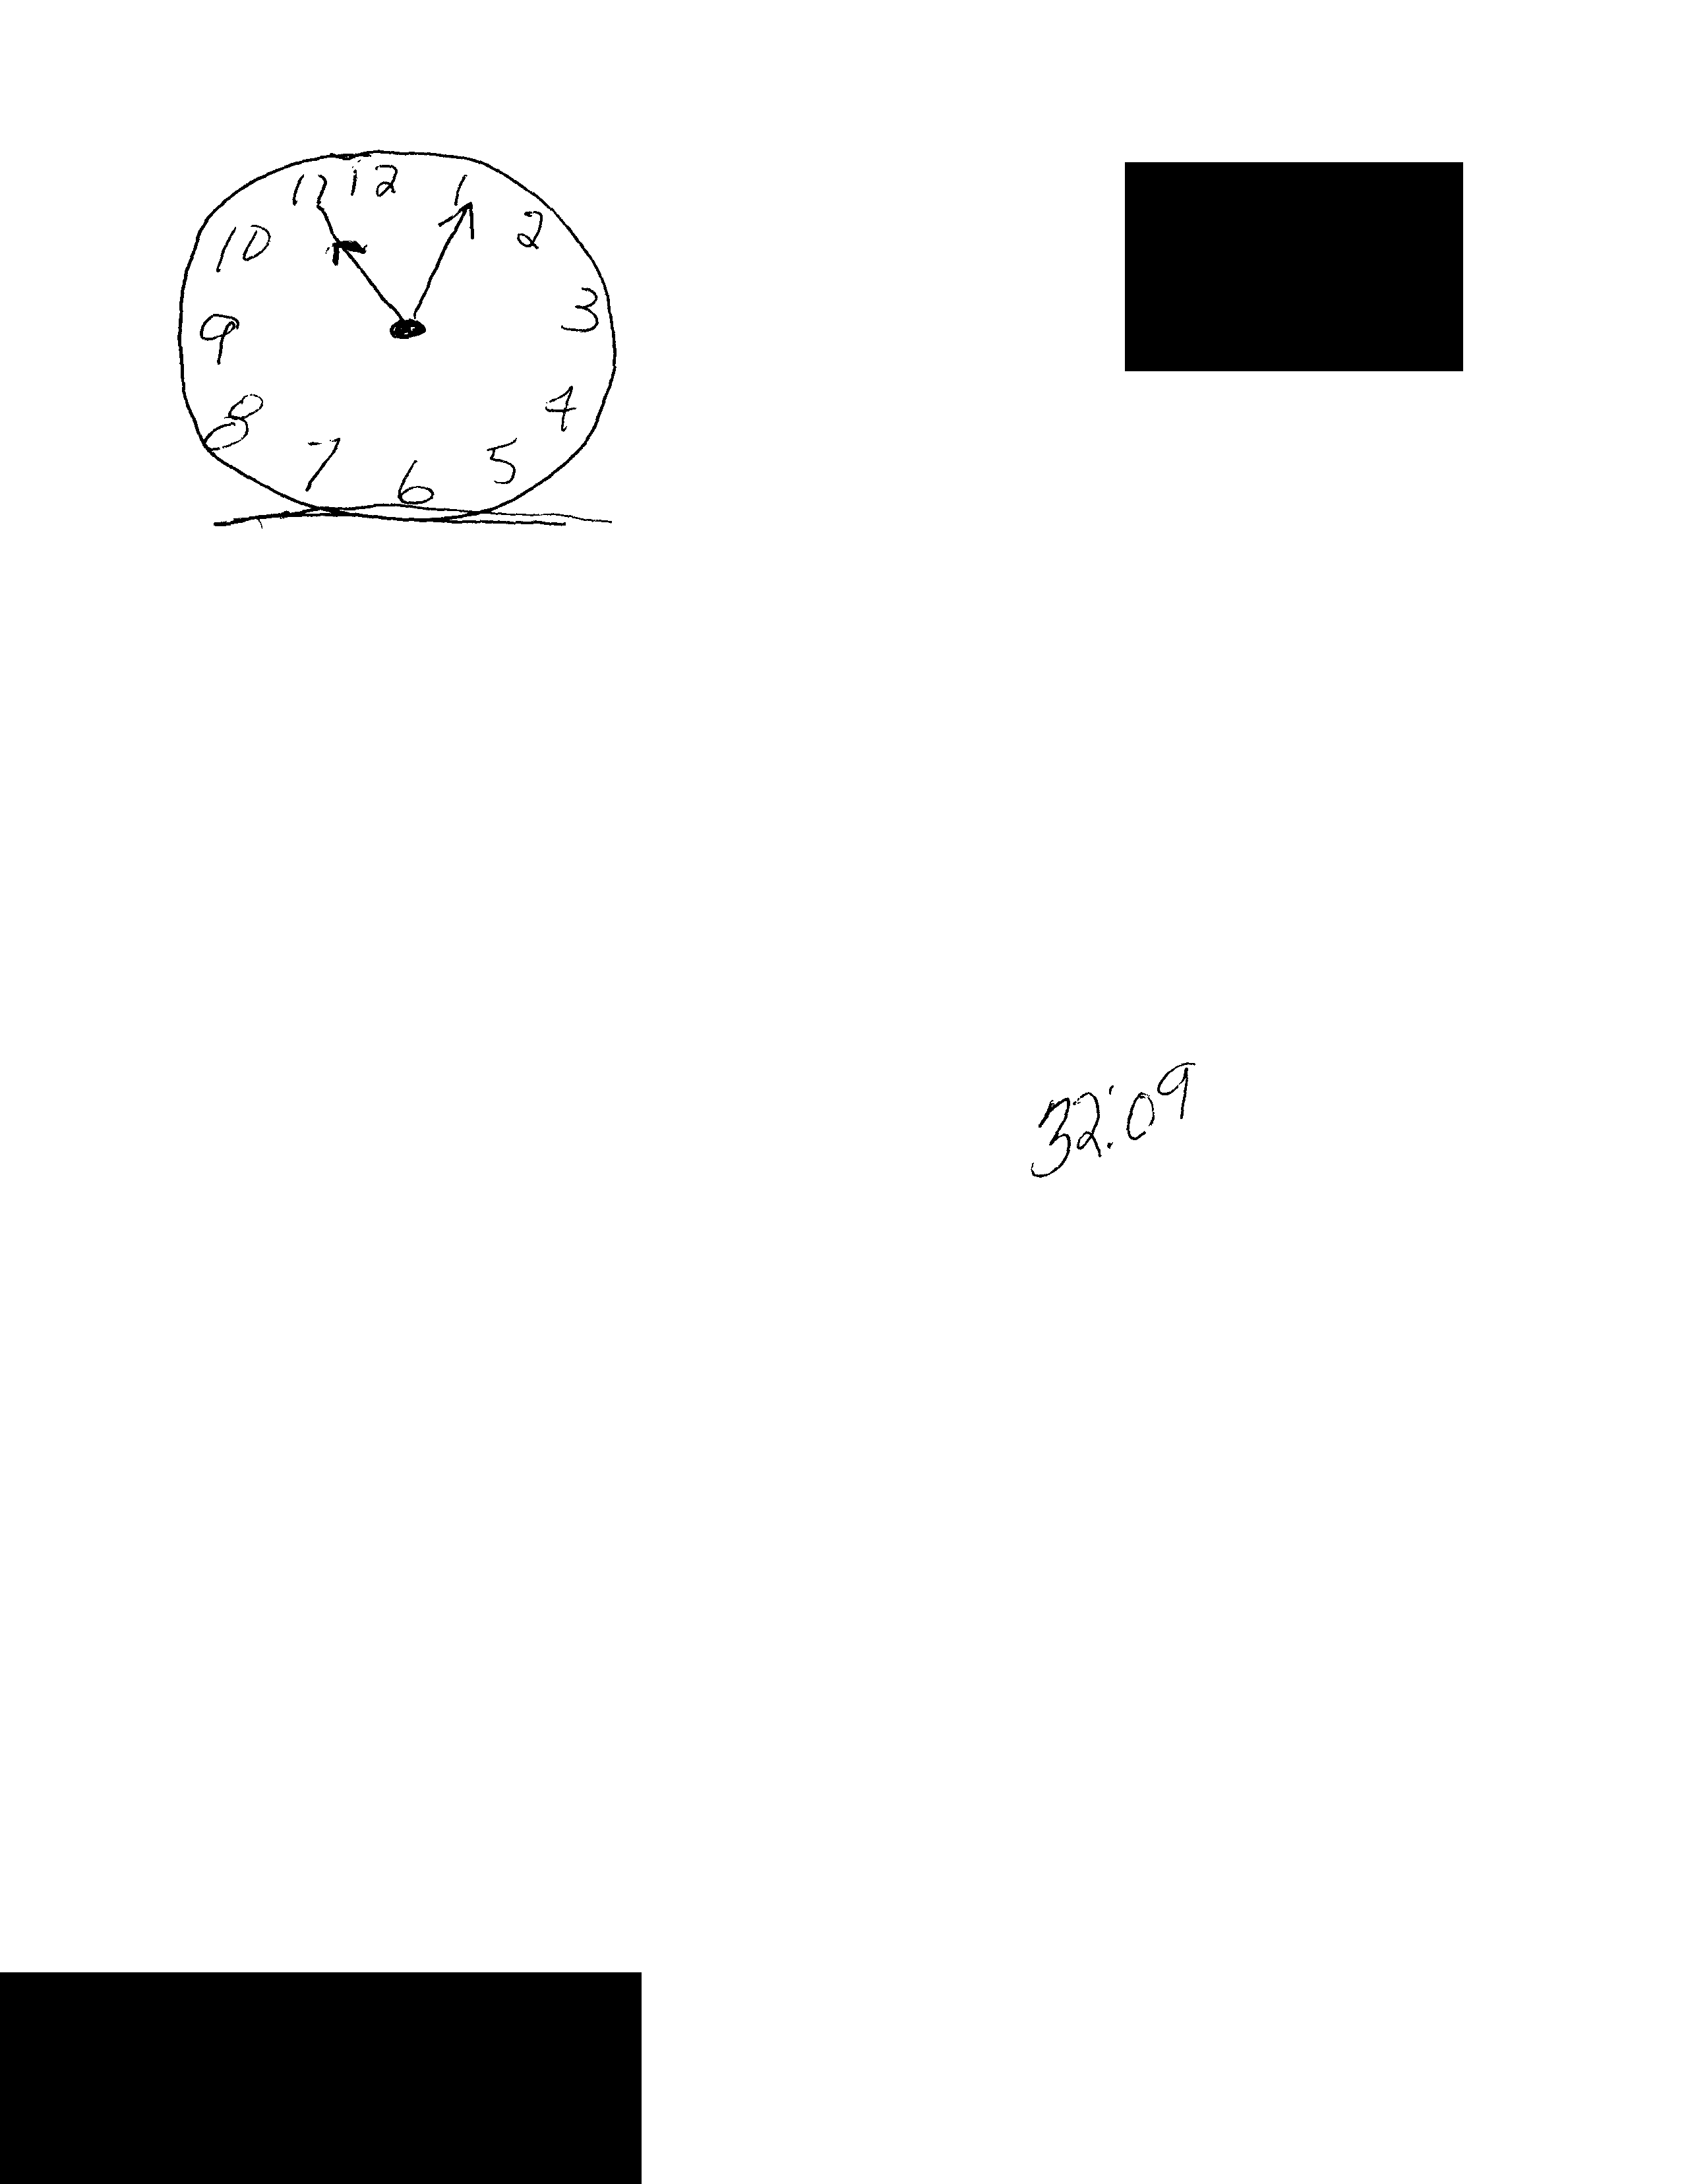

In [28]:
im_pil